In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 1s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/9482209981_bf7bf6022b_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/15054752730_fcf54d475e_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/6606749757_b98a4ba403.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9484354480_07ff2ef0a6.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/6140808687_88df0fd733.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/5492988531_574cdc2bf0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/20409866779_ac473f55e0_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8337607102_d9e0fa887e.jpg'),
 PosixPath('datasets/flower_photos/roses/7251352826_69b62cba2c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2059172936_032ffc12aa.jpg')]

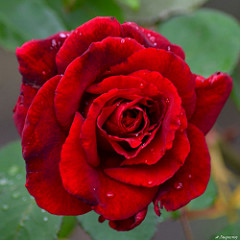

In [8]:
PIL.Image.open(str(roses[1]))

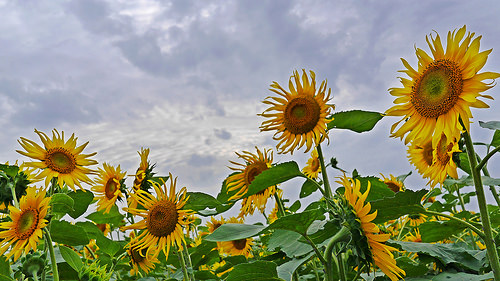

In [13]:
sunflowers = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sunflowers[10]))

In [14]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [15]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [16]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/5492988531_574cdc2bf0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/20409866779_ac473f55e0_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8337607102_d9e0fa887e.jpg'),
 PosixPath('datasets/flower_photos/roses/7251352826_69b62cba2c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2059172936_032ffc12aa.jpg')]

In [17]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/5492988531_574cdc2bf0_n.jpg'

In [18]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [19]:
img.shape

(240, 320, 3)

In [20]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [21]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [22]:
X = np.array(X)
y = np.array(y)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [26]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)  

Epoch 1/10
86/86 [==============================] - 93s 1s/step - loss: 1.3292 - accuracy: 0.4062
Epoch 2/10
86/86 [==============================] - 88s 1s/step - loss: 1.0405 - accuracy: 0.5832
Epoch 3/10
86/86 [==============================] - 88s 1s/step - loss: 0.8810 - accuracy: 0.6624
Epoch 4/10
86/86 [==============================] - 87s 1s/step - loss: 0.6932 - accuracy: 0.7300
Epoch 5/10
86/86 [==============================] - 89s 1s/step - loss: 0.4958 - accuracy: 0.8190
Epoch 6/10
86/86 [==============================] - 88s 1s/step - loss: 0.3179 - accuracy: 0.8848
Epoch 7/10
86/86 [==============================] - 90s 1s/step - loss: 0.1830 - accuracy: 0.9430
Epoch 8/10
86/86 [==============================] - 89s 1s/step - loss: 0.1007 - accuracy: 0.9742
Epoch 9/10
86/86 [==============================] - 88s 1s/step - loss: 0.0712 - accuracy: 0.9811
Epoch 10/10
86/86 [==============================] - 86s 1s/step - loss: 0.0377 - accuracy: 0.9920


In [27]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 9s 285ms/step - loss: 2.0634 - accuracy: 0.6383


[2.0634078979492188, 0.6383442282676697]

In [28]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 9s 296ms/step


array([[  1.1893803 ,   3.703889  ,  -4.3497825 , -14.920713  ,
         -1.104157  ],
       [  3.2937522 , -10.380872  ,  -7.354673  ,   5.0213895 ,
          1.4328334 ],
       [ -2.7066078 ,  -0.65842575,  -0.37187964,  -2.5235023 ,
         -0.8056672 ],
       ...,
       [ -8.875194  ,  -1.1408645 ,  -3.4383273 ,   3.9400673 ,
         -0.37698704],
       [  7.5471797 ,  -9.402559  ,  -6.0498405 , -12.104656  ,
          6.3942614 ],
       [ -4.9922557 ,  -5.447383  ,  -1.3823377 ,  10.129622  ,
         -6.315509  ]], dtype=float32)

In [29]:
score = tf.nn.softmax(predictions[0])

In [30]:
np.argmax(score)

1

In [31]:
y_test[0]

1

### Improve Test Accuracy Using Data Augmentation

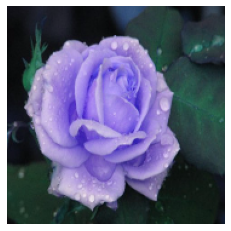

In [33]:
plt.axis('off')
plt.imshow(X[0])

In [36]:
data_augmentation = keras.Sequential(
  [
    
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

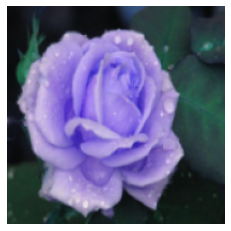

In [37]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [38]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)    

Epoch 1/10
86/86 [==============================] - 105s 1s/step - loss: 1.4697 - accuracy: 0.3681
Epoch 2/10
86/86 [==============================] - 104s 1s/step - loss: 1.0881 - accuracy: 0.5629
Epoch 3/10
86/86 [==============================] - 102s 1s/step - loss: 0.9563 - accuracy: 0.6323
Epoch 4/10
86/86 [==============================] - 105s 1s/step - loss: 0.8796 - accuracy: 0.6621
Epoch 5/10
86/86 [==============================] - 102s 1s/step - loss: 0.8126 - accuracy: 0.6853
Epoch 6/10
86/86 [==============================] - 103s 1s/step - loss: 0.7741 - accuracy: 0.7049
Epoch 7/10
86/86 [==============================] - 101s 1s/step - loss: 0.6995 - accuracy: 0.7300
Epoch 8/10
86/86 [==============================] - 102s 1s/step - loss: 0.6834 - accuracy: 0.7445
Epoch 9/10
86/86 [==============================] - 103s 1s/step - loss: 0.6365 - accuracy: 0.7634
Epoch 10/10
86/86 [==============================] - 103s 1s/step - loss: 0.6101 - accuracy: 0.7667


In [39]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 9s 305ms/step - loss: 0.9937 - accuracy: 0.6580


[0.9937454462051392, 0.657952070236206]